In [14]:
import os, sys # in built libraries to connect to operating system

import glob # use this handy library to identify all the files in data folder

import pandas as pd # for data manipulation
from collections import Counter # for specialised data types
from sklearn.cluster import KMeans # import k-means algorithm
from sklearn.preprocessing import MinMaxScaler # scale the data

# for visualising the data
%matplotlib inline
import matplotlib.pyplot as plt # visualisation library
import seaborn as sns # visualisation library

# audio data libraries
import librosa
import IPython.display as ipd # play the audio data


# access the scripts in the src folder
# this will error, unless you have the file create_audio_features_df in your src folder
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.create_audio_features_df import create_audio_features_df
from src.optimal_number_clusters import optimal_number_clusters


References:
- http://marsyas.info/downloads/datasets.html
- https://musicinformationretrieval.com/kmeans.html

### Load the Audio Data and Extract Features

In [2]:
# load the audio data from the data folder

list_of_audio_files = glob.glob('../data/*.wav')
list_of_audio_files

['../data/classical1.wav',
 '../data/marlene.wav',
 '../data/hendrix.wav',
 '../data/beatles.wav',
 '../data/birdland.wav',
 '../data/bigband.wav',
 '../data/rock.wav',
 '../data/blues.wav',
 '../data/chaka.wav',
 '../data/duke.wav',
 '../data/moanin.wav',
 '../data/loreena.wav',
 '../data/copland.wav',
 '../data/russo.wav',
 '../data/bagpipe.wav',
 '../data/tony.wav',
 '../data/glass.wav',
 '../data/guitar.wav',
 '../data/narch.wav',
 '../data/georose.wav',
 '../data/mingus.wav',
 '../data/brahms.wav',
 '../data/deedee.wav',
 '../data/canonaki.wav',
 '../data/ballad.wav',
 '../data/debussy.wav',
 '../data/pop.wav',
 '../data/corea.wav',
 '../data/opera.wav',
 '../data/winds.wav']

In [3]:
# number of audio files

print("# of audio files in the data folder:", len(list_of_audio_files))

# question: how would you "cluster" the audio data?

# of audio files in the data folder: 30


In [4]:
# extract features for all thirty files 

audio_features_df = create_audio_features_df(list_of_audio_files)

### Explore the Data

In [5]:
# check the shape of the data

audio_features_df.shape

(30, 2)

In [6]:
# preview the head of the data

audio_features_df.head(n = 5)

zero_crossing_rate      energy
audio_file_name                                
classical1.wav                35019   33.268707
marlene.wav                   53817   52.843853
hendrix.wav                   62196   75.526360
beatles.wav                   23928   84.270905
birdland.wav                  77597  111.841644

In [7]:
# can do some basic exploration

audio_features_df.describe()

# question: what does the describe function tell us about the features?
# question: what about the scale?

zero_crossing_rate      energy
count           30.000000   30.000000
mean         53244.666667   69.388468
std          23387.692291   28.040582
min          20191.000000   21.675022
25%          40096.750000   51.160083
50%          47939.500000   66.182312
75%          61957.500000   83.452192
max         126961.000000  129.563293

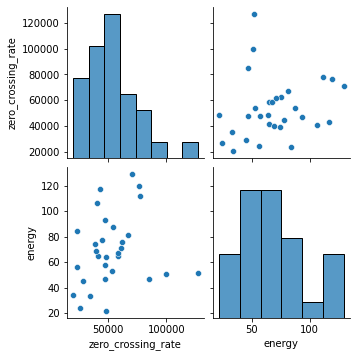

In [8]:
# visualise the data

sns.pairplot(audio_features_df);

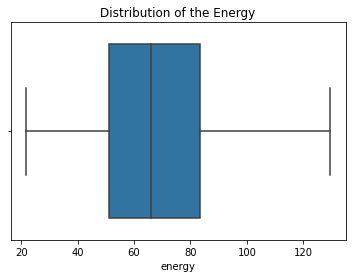

In [9]:
sns.boxplot(x = audio_features_df.energy)
plt.title("Distribution of the Energy");

# question: where is the min, maximum and median energy?

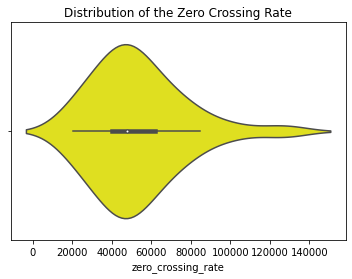

In [10]:
# visualise the distribution of zero crossing rate for all the audio data files

sns.violinplot(x = audio_features_df.zero_crossing_rate, color='yellow')
plt.title("Distribution of the Zero Crossing Rate");

# question: where do you see the zero crossing rate peaking?
# violion plots combine distribution of data and box plots

In [11]:
# check for any missing data

audio_features_df.isnull().sum()

zero_crossing_rate    0
energy                0
dtype: int64

### Scale the Features

When exploring the data, we try to change the data in such a way that the model can process it without any problems. And Feature Scaling is one such process in which we transform the data into a better version. Feature Scaling is done to normalize the features in the dataset into a finite range.

In [15]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
audio_features_scaled = min_max_scaler.fit_transform(audio_features_df)

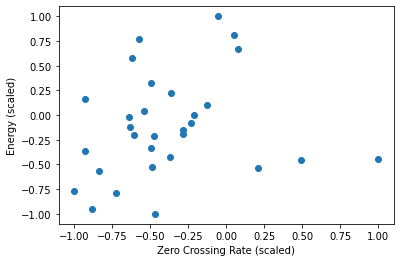

In [16]:
plt.scatter(audio_features_scaled[:,0], audio_features_scaled[:,1])
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)');

In [17]:
audio_features_scaled

# ccompare with dataframe above

array([[-0.72224408, -0.78507979],
       [-0.37012269, -0.42220168],
       [-0.21316849, -0.00172027],
       [-0.92999906,  0.16038345],
       [ 0.07532078,  0.67148145],
       [ 0.21084574, -0.5335637 ],
       [ 0.49008148, -0.45637922],
       [-0.46565515, -1.        ],
       [-0.05582092,  1.        ],
       [-0.603353  , -0.19749244],
       [-0.83916831, -0.56235001],
       [-0.28388124, -0.19418775],
       [-0.12662733,  0.0996753 ],
       [-0.62925916, -0.12299232],
       [ 1.        , -0.44452196],
       [-0.28642877, -0.15568701],
       [-0.23103868, -0.08272524],
       [-1.        , -0.77242139],
       [-0.64162218, -0.02082637],
       [-0.48491149, -0.529821  ],
       [-0.57119041,  0.77024116],
       [-0.62073616,  0.57834081],
       [-0.53829727,  0.0375029 ],
       [ 0.05125035,  0.81403539],
       [-0.88436827, -0.95401977],
       [-0.49182355, -0.33549752],
       [-0.49476445,  0.32533786],
       [-0.92951204, -0.36468019],
       [-0.36328557,

### Use K-Means algorithm to cluster the data

In [18]:
model = KMeans(n_clusters=2) # select a k to initially cluster the data
labels = model.fit_predict(audio_features_scaled) # predict clusters for the data

In [19]:
# print the labels

labels

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [20]:
Counter(labels)

# how many audio files have we classified as 0 and 1?

Counter({0: 21, 1: 9})

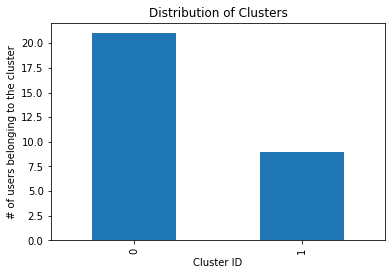

In [21]:
pd.DataFrame(Counter(labels).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

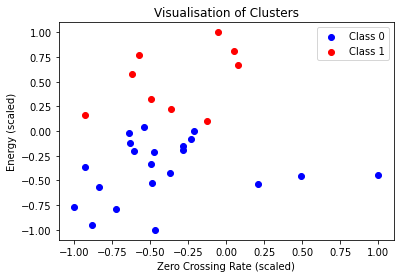

In [22]:
plt.scatter(audio_features_scaled[labels==0,0], audio_features_scaled[labels==0,1], c='b')
plt.scatter(audio_features_scaled[labels==1,0], audio_features_scaled[labels==1,1], c='r')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2', 'Class 3'))
plt.title("Visualisation of Clusters");

In [23]:
print("The centroids for the clusters")

pd.DataFrame(model.cluster_centers_, columns = audio_features_df.columns)

The centroids for the clusters


zero_crossing_rate    energy
0           -0.399498 -0.386110
1           -0.337317  0.515915

### Identify optimal number of clusters

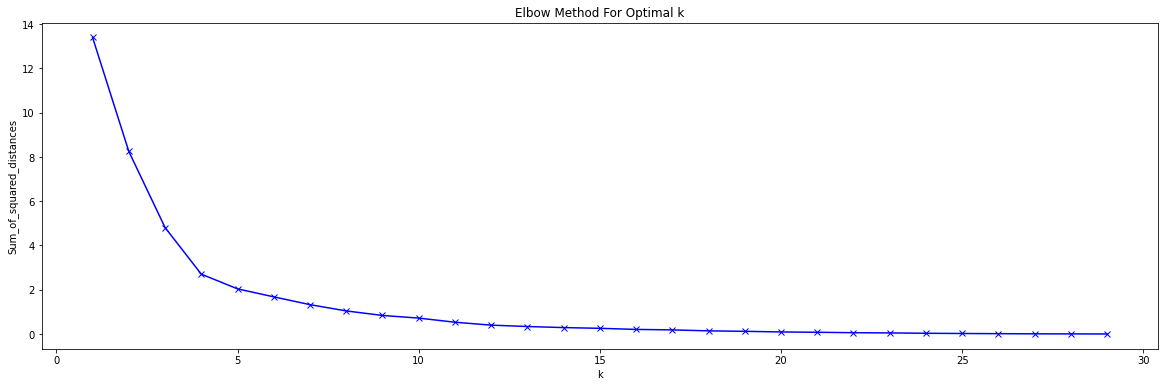

In [24]:
optimal_number_clusters(audio_features_scaled)

# question: what is the optimal number of clusters?
# hint: it is where the elbow starts to form, and we see the change in SSE becoming consistent 

### Cluster the audio data with optimal number of clusters

In [25]:
optimal_k = 5

model = KMeans(n_clusters=optimal_k) # select a k to initially cluster the data

labels = model.fit_predict(audio_features_scaled)

In [26]:
Counter(labels)

Counter({0: 7, 2: 12, 1: 5, 4: 3, 3: 3})

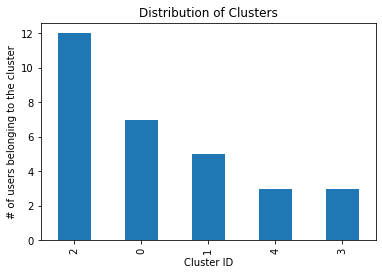

In [27]:
pd.DataFrame(Counter(labels).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

### Evaluate the clusters 

In [28]:
# create a dataframe which includes the predicted cluster

labels_df = pd.DataFrame(labels).reset_index(drop = True)

audio_features_df.insert(2, 'cluster', labels_df)
audio_features_df


zero_crossing_rate      energy  cluster
audio_file_name                                         
classical1.wav                35019   33.268707        0
marlene.wav                   53817   52.843853        2
hendrix.wav                   62196   75.526360        2
beatles.wav                   23928   84.270905        1
birdland.wav                  77597  111.841644        4
bigband.wav                   84832   46.836525        3
rock.wav                      99739   51.000175        3
blues.wav                     48717   21.675022        0
chaka.wav                     70596  129.563293        4
duke.wav                      41366   64.965599        2
moanin.wav                    28777   45.283672        0
loreena.wav                   58421   65.143867        2
copland.wav                   66816   80.996056        2
russo.wav                     39983   68.984444        2
bagpipe.wav                  126961   51.639805        3
tony.wav                      58285   67.220757        2
glass.wav                     61242   71.156616        2
guitar.wav                    20191   33.951553        0
narch.wav                     39323   74.495697        2
georose.wav                   47689   47.038422        0
mingus.wav                    43083  117.169151        1
brahms.wav                    40438  106.817253        1
deedee.wav                    44839   77.642220        2
canonaki.wav                  76312  119.531593        4
ballad.wav                    26364   24.155386        0
debussy.wav                   47320   57.521034        2
pop.wav                       47163   93.169228        1
corea.wav                     23954   55.946800        0
opera.wav                     54182   87.688400        1
winds.wav                     48190   64.310013        2

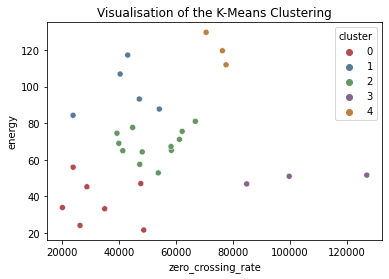

In [29]:
cmap = sns.color_palette("Set1", n_colors = optimal_k, desat = .5)

sns.scatterplot(x='zero_crossing_rate', y='energy', hue='cluster', data=audio_features_df, palette = cmap)
plt.title("Visualisation of the K-Means Clustering");

In [30]:
# identify some samples from cluster 2

cluster_2_audio_files = audio_features_df[audio_features_df.cluster == 2]
cluster_2_audio_files

zero_crossing_rate     energy  cluster
audio_file_name                                        
marlene.wav                   53817  52.843853        2
hendrix.wav                   62196  75.526360        2
duke.wav                      41366  64.965599        2
loreena.wav                   58421  65.143867        2
copland.wav                   66816  80.996056        2
russo.wav                     39983  68.984444        2
tony.wav                      58285  67.220757        2
glass.wav                     61242  71.156616        2
narch.wav                     39323  74.495697        2
deedee.wav                    44839  77.642220        2
debussy.wav                   47320  57.521034        2
winds.wav                     48190  64.310013        2

In [31]:
cluster_2_audio_files.shape

(12, 3)

In [32]:
audio_file ='../data/marlene.wav'

#Playing the audio
ipd.Audio(audio_file)

In [33]:
audio_file ='../data/loreena.wav'

#Playing the audio
ipd.Audio(audio_file)

In [34]:
cluster_2_audio_files.describe()

zero_crossing_rate     energy  cluster
count           12.000000  12.000000     12.0
mean         51816.500000  68.400543      2.0
std           9527.041509   8.206561      0.0
min          39323.000000  52.843853      2.0
25%          43970.750000  64.801702      2.0
50%          51003.500000  68.102600      2.0
75%          59126.250000  74.753363      2.0
max          66816.000000  80.996056      2.0

In [35]:
# identify some samples from cluster 0

cluster_0_audio_files = audio_features_df[audio_features_df.cluster == 0]
cluster_0_audio_files

zero_crossing_rate     energy  cluster
audio_file_name                                        
classical1.wav                35019  33.268707        0
blues.wav                     48717  21.675022        0
moanin.wav                    28777  45.283672        0
guitar.wav                    20191  33.951553        0
georose.wav                   47689  47.038422        0
ballad.wav                    26364  24.155386        0
corea.wav                     23954  55.946800        0

In [36]:
audio_file ='../data/classical1.wav'

#Playing the audio
ipd.Audio(audio_file)

In [37]:
cluster_0_audio_files.describe()

zero_crossing_rate     energy  cluster
count            7.000000   7.000000      7.0
mean         32958.714286  37.331366      0.0
std          11362.409233  12.587404      0.0
min          20191.000000  21.675022      0.0
25%          25159.000000  28.712047      0.0
50%          28777.000000  33.951553      0.0
75%          41354.000000  46.161047      0.0
max          48717.000000  55.946800      0.0

In [38]:
# identify some samples from cluster 0

cluster_4_audio_files = audio_features_df[audio_features_df.cluster == 4]
cluster_4_audio_files

zero_crossing_rate      energy  cluster
audio_file_name                                         
birdland.wav                  77597  111.841644        4
chaka.wav                     70596  129.563293        4
canonaki.wav                  76312  119.531593        4

In [39]:
audio_file ='../data/mingus.wav'

#Playing the audio
ipd.Audio(audio_file)

In [40]:
# identify some samples from cluster 0

cluster_1_audio_files = audio_features_df[audio_features_df.cluster == 1]
cluster_1_audio_files

zero_crossing_rate      energy  cluster
audio_file_name                                         
beatles.wav                   23928   84.270905        1
mingus.wav                    43083  117.169151        1
brahms.wav                    40438  106.817253        1
pop.wav                       47163   93.169228        1
opera.wav                     54182   87.688400        1

In [41]:
# identify some samples from cluster 0

cluster_3_audio_files = audio_features_df[audio_features_df.cluster == 3]
cluster_3_audio_files

zero_crossing_rate     energy  cluster
audio_file_name                                        
bigband.wav                   84832  46.836525        3
rock.wav                      99739  51.000175        3
bagpipe.wav                  126961  51.639805        3

In [42]:
# instead of looking at each cluster individually, can do some aggregations
# look at the average zero crossing rate and energy for all clusters

audio_features_df.groupby(["cluster"]).mean().sort_values(by = ["energy"], ascending = False)

# which cluster has the highest energy? 

zero_crossing_rate      energy
cluster                                
4              74835.000000  120.312177
1              41758.800000   97.822987
2              51816.500000   68.400543
3             103844.000000   49.825502
0              32958.714286   37.331366

In [43]:
audio_features_df.groupby(["cluster"]).agg(['min', 'max', 'mean', 'count'])


zero_crossing_rate                                   energy  \
                       min     max           mean count         min   
cluster                                                               
0                    20191   48717   32958.714286     7   21.675022   
1                    23928   54182   41758.800000     5   84.270905   
2                    39323   66816   51816.500000    12   52.843853   
3                    84832  126961  103844.000000     3   46.836525   
4                    70596   77597   74835.000000     3  111.841644   

                                       
                max        mean count  
cluster                                
0         55.946800   37.331366     7  
1        117.169151   97.822987     5  
2         80.996056   68.400543    12  
3         51.639805   49.825502     3  
4        129.563293  120.312177     3

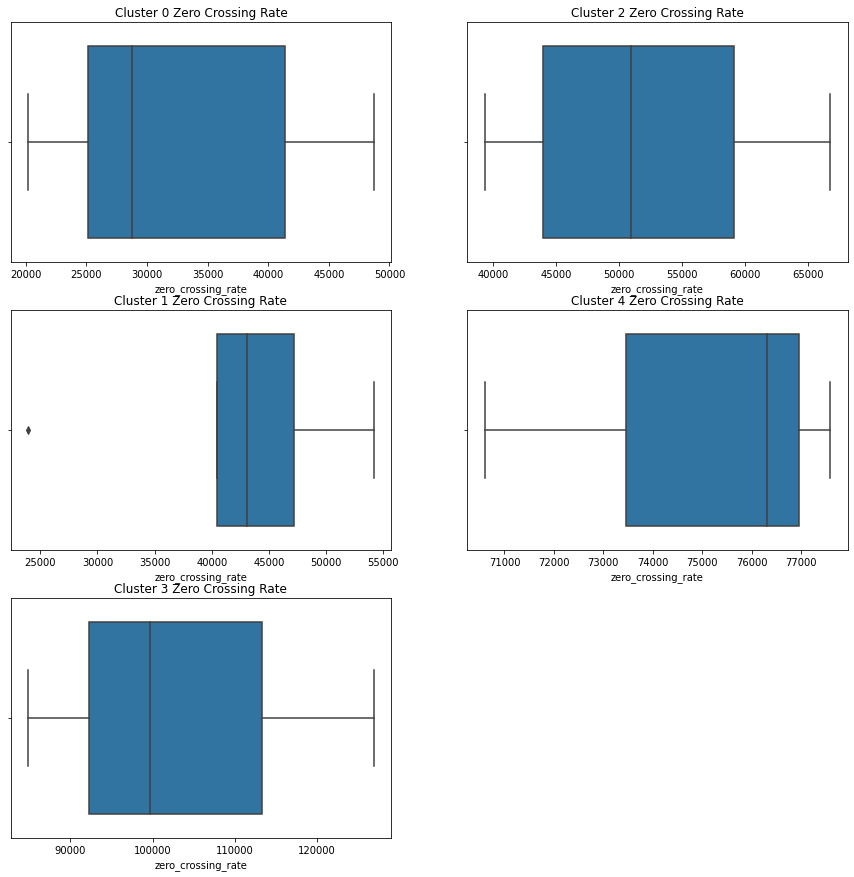

In [44]:
# Distibution of Zero Crossing Rate

clusters = audio_features_df["cluster"].unique() 

x = 1
plt.figure(figsize=(15, 15))
for x, c in enumerate(clusters):
    ax = plt.subplot(3, 2, x + 1)
    plt.title(f'Cluster {c} Zero Crossing Rate')
    sns.boxplot(x = audio_features_df[audio_features_df["cluster"] == c]["zero_crossing_rate"])

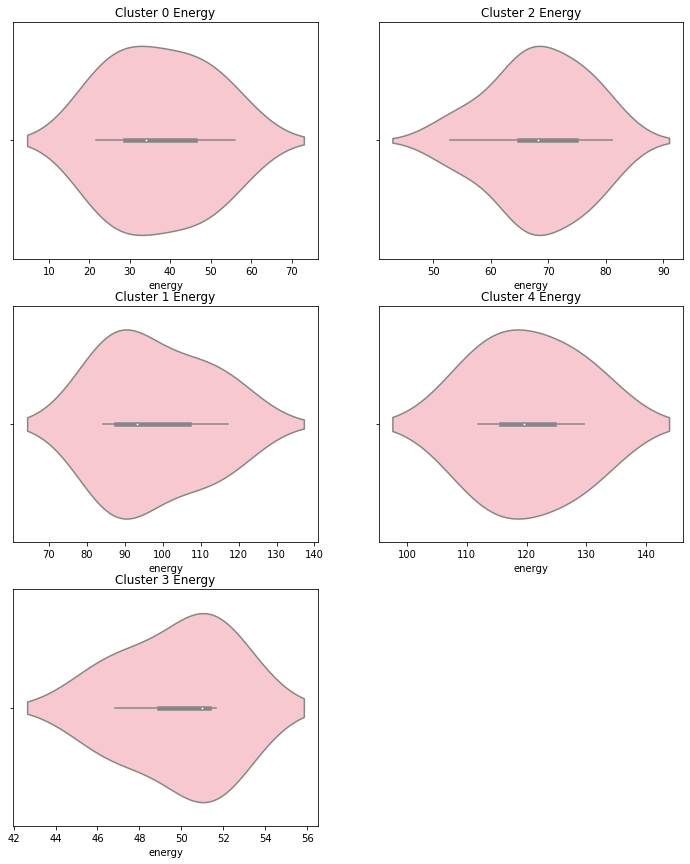

In [45]:
# Distibution of Energy


clusters = audio_features_df["cluster"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Energy')
    sns.violinplot(x = audio_features_df[audio_features_df["cluster"] == c]["energy"], color='pink')

Questions:
- what is the optimal number of clusters?
- which cluster has the most number of audio files?
- what is the distribution of energy and zero crossing rate in a specific cluster?
- does the music in the specific cluster make sense?
- what is the distribution of energy and zero crossing rate across the different clusters? which cluster has the widest range, highest average energy/zero cross rating?
- how do the clusters behaviour compare to the entire dataset?